In [1]:
import numpy as np 
import pandas as pd 
import re # this is the regular expression library which helps us manipulate text (strings) fairly easily and intuitively
import nltk # this is the Natural Language Tool Kit which contains a lot of functionalities for text analytics
import matplotlib.pyplot as plt
import string # this is used for string manipulations
import matplotlib
import random

In [2]:
import nltk
nltk.download('inaugural')
from nltk.corpus import inaugural
inaugural.fileids()
inaugural.raw('1941-Roosevelt.txt')
inaugural.raw('1961-Kennedy.txt')
inaugural.raw('1973-Nixon.txt')

[nltk_data] Downloading package inaugural to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package inaugural is already up-to-date!


'Mr. Vice President, Mr. Speaker, Mr. Chief Justice, Senator Cook, Mrs. Eisenhower, and my fellow citizens of this great and good country we share together:\n\nWhen we met here four years ago, America was bleak in spirit, depressed by the prospect of seemingly endless war abroad and of destructive conflict at home.\n\nAs we meet here today, we stand on the threshold of a new era of peace in the world.\n\nThe central question before us is: How shall we use that peace? Let us resolve that this era we are about to enter will not be what other postwar periods have so often been: a time of retreat and isolation that leads to stagnation at home and invites new danger abroad.\n\nLet us resolve that this will be what it can become: a time of great responsibilities greatly borne, in which we renew the spirit and the promise of America as we enter our third century as a nation.\n\nThis past year saw far-reaching results from our new policies for peace. By continuing to revitalize our traditional

In [3]:
data_roosevelt = inaugural.raw('1941-Roosevelt.txt')
data_kennedy = inaugural.raw('1961-Kennedy.txt')
data_nixon = inaugural.raw('1973-Nixon.txt')

In [4]:
list_names = {"President":[], "Speech":[], "Word_Count":[], "Char_Count":[]}

In [5]:
df = pd.DataFrame(list_names)

In [6]:
list_name = ["Roosevelt", "Kennedy", "Nixon"]
list_speech = [data_roosevelt, data_kennedy, data_nixon]

In [7]:
df["President"] = list_name
df["Speech"] = list_speech

In [8]:
df

,President,Speech,Word_Count,Char_Count
0,Roosevelt,On each national day of inauguration since 178...,NaN,NaN
1,Kennedy,"Vice President Johnson, Mr. Speaker, Mr. Chief...",NaN,NaN
2,Nixon,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus...",NaN,NaN


In [9]:
df.index += 1

In [10]:
df

,President,Speech,Word_Count,Char_Count
1,Roosevelt,On each national day of inauguration since 178...,NaN,NaN
2,Kennedy,"Vice President Johnson, Mr. Speaker, Mr. Chief...",NaN,NaN
3,Nixon,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus...",NaN,NaN


In [11]:
df["Char_Count"] = df.Speech.str.len()

In [12]:
len_roose = len(inaugural.words('1941-Roosevelt.txt'))
len_kennedy = len(inaugural.words('1961-Kennedy.txt'))
len_nixon = len(inaugural.words('1973-Nixon.txt'))

len_list = [len_roose, len_kennedy, len_nixon]
df["Word_Count"] = len_list

In [13]:
df

,President,Speech,Word_Count,Char_Count
1,Roosevelt,On each national day of inauguration since 178...,1536,7571
2,Kennedy,"Vice President Johnson, Mr. Speaker, Mr. Chief...",1546,7618
3,Nixon,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus...",2028,9991


In [14]:
from nltk.tokenize import sent_tokenize

In [15]:
roose = sent_tokenize(inaugural.raw("1941-Roosevelt.txt"))
len(roose)

68

In [16]:
kennedy = sent_tokenize(inaugural.raw('1961-Kennedy.txt'))
len(kennedy)

52

In [17]:
nixon = sent_tokenize(inaugural.raw('1973-Nixon.txt'))
len(nixon)

68

In [18]:
from nltk.corpus import stopwords

In [19]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [20]:
stop = stopwords.words("english")

In [21]:
stop.sort()

In [22]:
stop

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [23]:
#lower case
df["Preprocessed"] = df["Speech"].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [24]:
df

,President,Speech,Word_Count,Char_Count,Preprocessed
1,Roosevelt,On each national day of inauguration since 178...,1536,7571,on each national day of inauguration since 178...
2,Kennedy,"Vice President Johnson, Mr. Speaker, Mr. Chief...",1546,7618,"vice president johnson, mr. speaker, mr. chief..."
3,Nixon,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus...",2028,9991,"mr. vice president, mr. speaker, mr. chief jus..."


In [25]:
df["Preprocessed"] = df["Preprocessed"].str.replace('[^a-zA-Z\s]','')

In [26]:
df

,President,Speech,Word_Count,Char_Count,Preprocessed
1,Roosevelt,On each national day of inauguration since 178...,1536,7571,on each national day of inauguration since th...
2,Kennedy,"Vice President Johnson, Mr. Speaker, Mr. Chief...",1546,7618,vice president johnson mr speaker mr chief jus...
3,Nixon,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus...",2028,9991,mr vice president mr speaker mr chief justice ...


In [27]:
#counting number of stop words and removing them
df["Stop_Count"] = df["Preprocessed"].apply(lambda x: len([x for x in x.split() if x in stop]))

In [28]:
df

,President,Speech,Word_Count,Char_Count,Preprocessed,Stop_Count
1,Roosevelt,On each national day of inauguration since 178...,1536,7571,on each national day of inauguration since th...,711
2,Kennedy,"Vice President Johnson, Mr. Speaker, Mr. Chief...",1546,7618,vice president johnson mr speaker mr chief jus...,672
3,Nixon,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus...",2028,9991,mr vice president mr speaker mr chief justice ...,969


In [29]:
df['Preprocessed'] = df['Preprocessed'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df['Preprocessed'].head()

1    national day inauguration since people renewed...
2    vice president johnson mr speaker mr chief jus...
3    mr vice president mr speaker mr chief justice ...
Name: Preprocessed, dtype: object

In [30]:
df

,President,Speech,Word_Count,Char_Count,Preprocessed,Stop_Count
1,Roosevelt,On each national day of inauguration since 178...,1536,7571,national day inauguration since people renewed...,711
2,Kennedy,"Vice President Johnson, Mr. Speaker, Mr. Chief...",1546,7618,vice president johnson mr speaker mr chief jus...,672
3,Nixon,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus...",2028,9991,mr vice president mr speaker mr chief justice ...,969


In [31]:
df["Word_Count(after_removing)"] = df["Preprocessed"].apply(lambda x: len(str(x).split()))


In [32]:
df

,President,Speech,Word_Count,Char_Count,Preprocessed,Stop_Count,Word_Count(after_removing)
1,Roosevelt,On each national day of inauguration since 178...,1536,7571,national day inauguration since people renewed...,711,623
2,Kennedy,"Vice President Johnson, Mr. Speaker, Mr. Chief...",1546,7618,vice president johnson mr speaker mr chief jus...,672,691
3,Nixon,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus...",2028,9991,mr vice president mr speaker mr chief justice ...,969,832


In [33]:
roose_freq = pd.Series(''.join(df["Preprocessed"][1]).split()).value_counts()[:10]
roose_freq


# roosevelt_freq = pd.Series(' '.join(df['Tweet']).split()).value_counts()[:10]
# roosevelt_freq

nation       11
know         10
spirit        9
democracy     9
us            8
life          8
people        7
america       7
freedom       6
years         6
dtype: int64

In [34]:
Kennedy_freq = pd.Series(''.join(df["Preprocessed"][2]).split()).value_counts()[:10]
Kennedy_freq

let        16
us         12
world       8
sides       8
new         7
pledge      7
shall       5
power       5
nations     5
ask         5
dtype: int64

In [35]:
nixon_freq = pd.Series(''.join(df["Preprocessed"][3]).split()).value_counts()[:10]
nixon_freq

us                26
let               22
peace             19
world             16
new               15
america           13
responsibility    11
government        10
home               9
great              9
dtype: int64

In [36]:
new_stopwords = ["let", "new", "us"]
stop.extend(new_stopwords)

In [37]:
df["Preprocessed"] = df["Preprocessed"].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

In [38]:
df

,President,Speech,Word_Count,Char_Count,Preprocessed,Stop_Count,Word_Count(after_removing)
1,Roosevelt,On each national day of inauguration since 178...,1536,7571,national day inauguration since people renewed...,711,623
2,Kennedy,"Vice President Johnson, Mr. Speaker, Mr. Chief...",1546,7618,vice president johnson mr speaker mr chief jus...,672,691
3,Nixon,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus...",2028,9991,mr vice president mr speaker mr chief justice ...,969,832


In [39]:
roose_freq_new = pd.Series(''.join(df["Preprocessed"][1]).split()).value_counts()[:10]
roose_freq_new

nation       11
know         10
democracy     9
spirit        9
life          8
america       7
people        7
freedom       6
years         6
mind          5
dtype: int64

In [40]:
Kennedy_freq_new = pd.Series(''.join(df["Preprocessed"][2]).split()).value_counts()[:10]
Kennedy_freq_new

world       8
sides       8
pledge      7
citizens    5
free        5
shall       5
ask         5
nations     5
power       5
war         4
dtype: int64

In [41]:
nixon_freq_new = pd.Series(''.join(df["Preprocessed"][3]).split()).value_counts()[:10]
nixon_freq_new

peace             19
world             16
america           13
responsibility    11
government        10
home               9
great              9
abroad             8
americas           8
nation             8
dtype: int64

In [42]:
# creating word cloud

corpus = df["Preprocessed"]
corpus1 = df['Preprocessed'][1]
corpus2 = df['Preprocessed'][2]
corpus3 = df['Preprocessed'][3]

In [43]:
wordcloud_a = ' '.join(corpus)
wordcloud_a1 = ' '.join(corpus1)
wordcloud_a2 = ' '.join(corpus2)
wordcloud_a3 = ' '.join(corpus3)

Word Cloud for President's Speech after cleaning


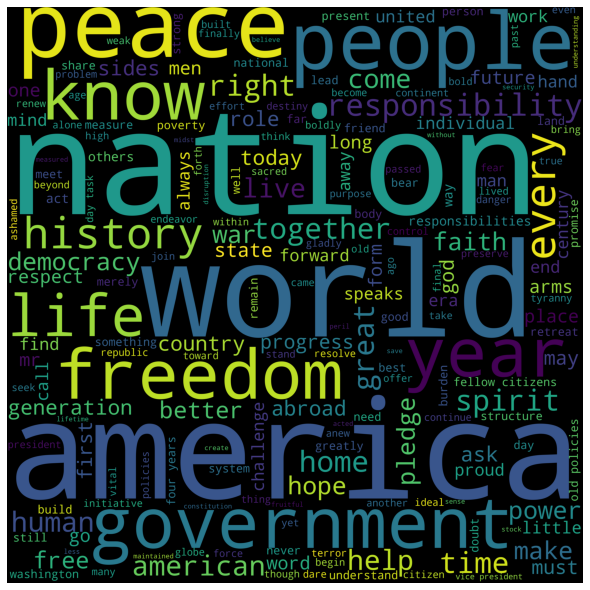

In [44]:
# Word Cloud 
from wordcloud import WordCloud
wordcloud = WordCloud(width = 3000, height = 3000, 
                background_color ='black', 
                min_font_size = 10, random_state=100).generate(wordcloud_a) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off")
plt.xlabel('Word Cloud')
plt.tight_layout(pad = 0) 

print("Word Cloud for President's Speech after cleaning")
plt.show()

#Tip: You can specify stopwords, regex (punctuations/symbols) in the wordcloud itself, check CTRL+TAB on the wordcloud fuction!

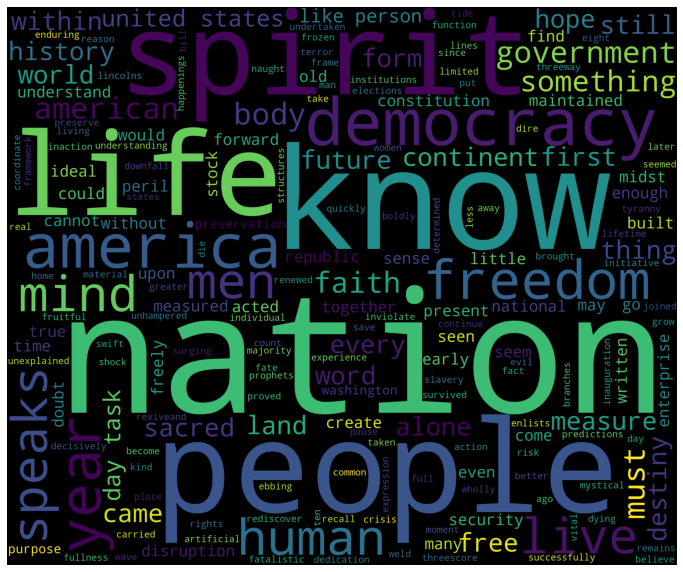

In [45]:
from wordcloud import WordCloud
df_new=df['Preprocessed']
words = ' '.join(df_new)
cleaned_word = " ".join([word for word in words.split()
                            if word not in stop
                        ])
wordcloud = WordCloud(stopwords=stop,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(corpus1)
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

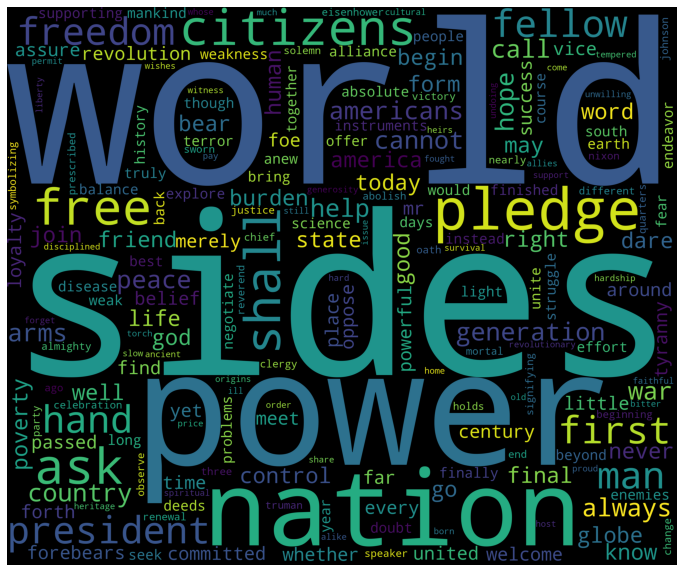

In [46]:
from wordcloud import WordCloud
df_new=df['Preprocessed']
words = ' '.join(df_new)
cleaned_word = " ".join([word for word in words.split()
                            if word not in stop
                        ])
wordcloud = WordCloud(stopwords=stop,
                      background_color='Black',
                      width=3000,
                      height=2500
                     ).generate(corpus2)
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

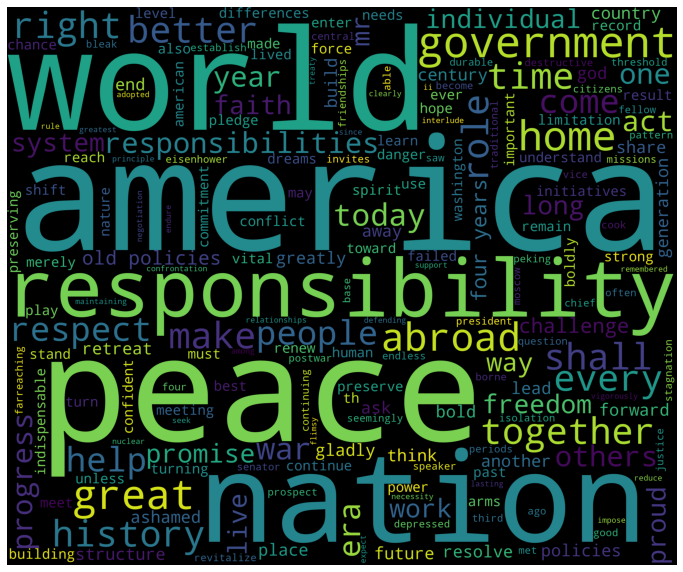

In [47]:
from wordcloud import WordCloud
df_new=df['Preprocessed']
words = ' '.join(df_new)
cleaned_word = " ".join([word for word in words.split()
                            if word not in stop
                        ])
wordcloud = WordCloud(stopwords=stop,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(corpus3)
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()